# PyTorch & fastai

Example from: https://docs.fast.ai/quick_start.html

In [1]:
from importlib.metadata import version

In [ ]:
pip install fastai

In [3]:
version('fastai')

'2.7.17'

## Computer vision classification

In [4]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.PETS)/'images'

In [6]:
path

Path('/models/fastai/data/oxford-iiit-pet/images')

In [7]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [8]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /models/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:00<00:00, 92.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.152910,0.027264,0.006766,03:07


epoch,train_loss,valid_loss,error_rate,time
0,0.061987,0.022147,0.006766,01:25


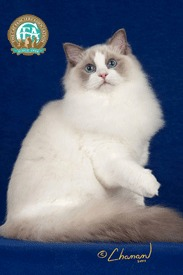

In [12]:
img = PILImage.create(get_image_files(path)[9])
img

In [13]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000
